<a href="https://colab.research.google.com/github/oliviasteeed/Computer-Vision-Project/blob/main/Computer_Vision_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Computer Vision Project: Handwriting to typed text
This model addresses the segmentation problem of identifying different letters in handwritten text, and converts uploaded images to typed text.

It uses a segmentation algorithm trained with supervised learning from labeled images of handwritten letters.

### Stage 1: Set up ultralytics

In [1]:
!pip3 install ultralytics
import ultralytics
ultralytics.checks()

Ultralytics 8.3.17 🚀 Python-3.12.6 torch-2.2.2 CPU (Intel Core(TM) i5-5257U 2.70GHz)
Setup complete ✅ (4 CPUs, 8.0 GB RAM, 293.4/894.1 GB disk)


### Stage 2: Initial segmentation model

Ultralytics 8.3.17 🚀 Python-3.12.6 torch-2.2.2 CPU (Intel Core(TM) i5-5257U 2.70GHz)
YOLOv8s-seg summary (fused): 195 layers, 11,810,560 parameters, 0 gradients, 42.6 GFLOPs

Found https://ultralytics.com/images/zidane.jpg locally at zidane.jpg
image 1/1 /Users/oliviasteed/zidane.jpg: 384x640 2 persons, 2 ties, 517.0ms
Speed: 4.1ms preprocess, 517.0ms inference, 7.2ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/segment/predict2
💡 Learn more at https://docs.ultralytics.com/modes/predict


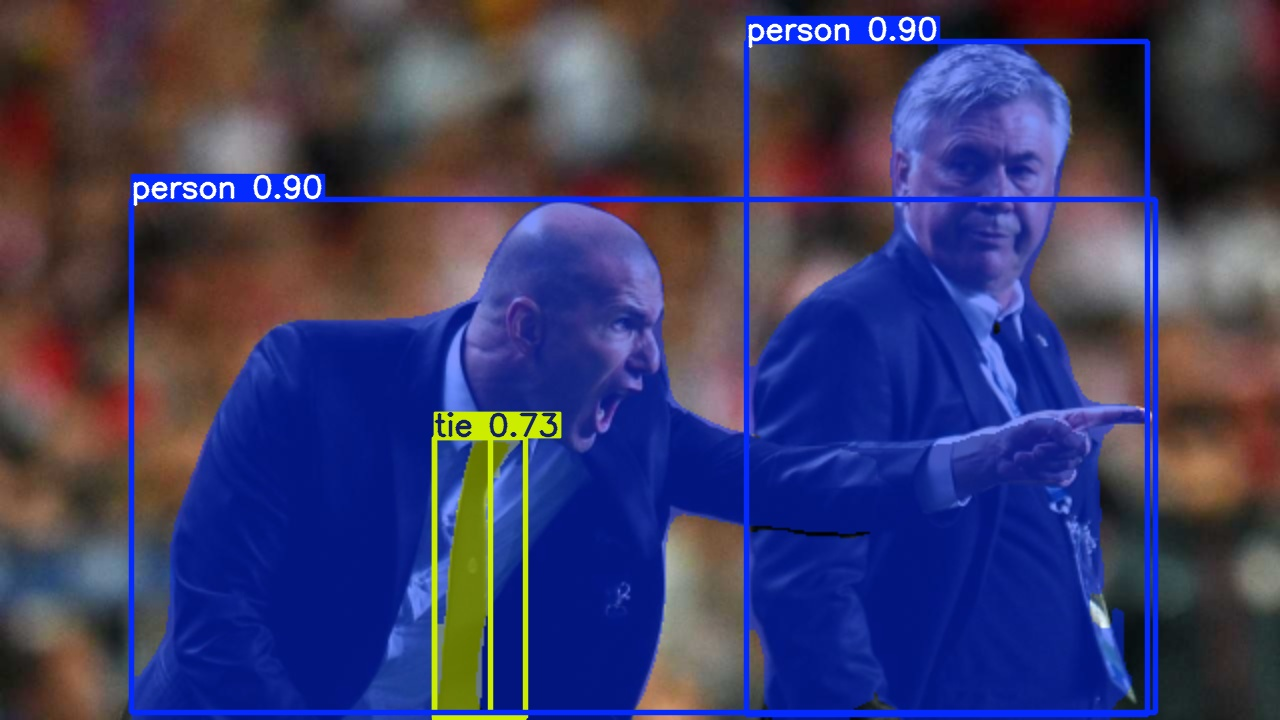

In [4]:
# run segmentation model
!yolo segment predict  model=yolov8s-seg.pt source='https://ultralytics.com/images/zidane.jpg'

# show resulting image
%matplotlib inline
from PIL import Image

Image.open('/Users/oliviasteed/runs/segment/predict/zidane.jpg')


Found https://ultralytics.com/images/zidane.jpg locally at zidane.jpg
image 1/1 /Users/oliviasteed/zidane.jpg: 384x640 2 persons, 1 tie, 231.1ms
Speed: 3.6ms preprocess, 231.1ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


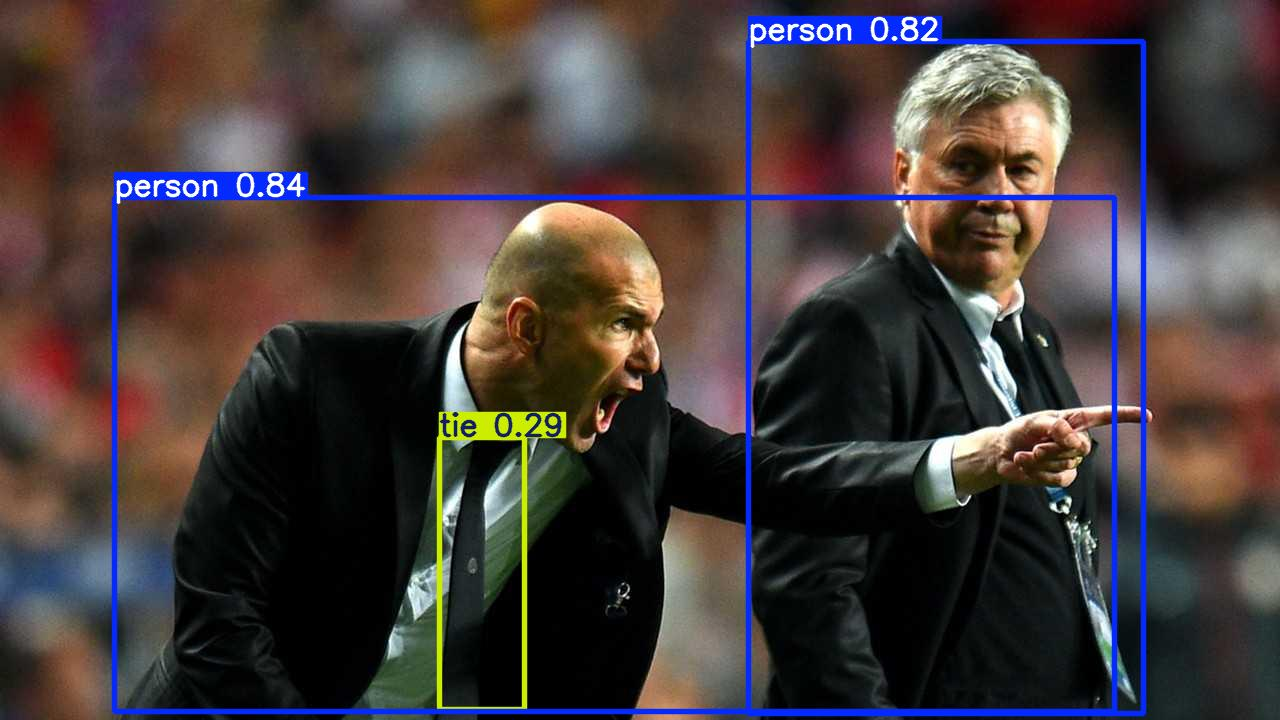

In [6]:
# using out of the box model

%matplotlib inline
from PIL import Image

from ultralytics import YOLO

# Load a pretrained YOLOv8n model
model = YOLO('yolov8n.pt')

# Run inference on image
results = model('https://ultralytics.com/images/zidane.jpg')
# you can give it a list of images

# Show the results
for r in results:
    im_array = r.plot()  # plot a BGR numpy array of predictions
    im = Image.fromarray(im_array[..., ::-1])  # RGB PIL image
    im.save('results.jpg')  # save image


#show saved image
Image.open('results.jpg')

In [9]:
# doing my own transfer learning with text data and my own added data

from ultralytics import YOLO

# Load a model
# model = YOLO("yolov8n-seg.yaml")  # build a new model from YAML
# model = YOLO("yolov8n-seg.pt")  # load a pretrained model (recommended for training)

model = YOLO("yolov8n-seg.yaml").load("yolov8n.pt")  # build from YAML and transfer weights

# Train the model - INPUT MY NEW DATA HERE
results = model.train(data="coco8-seg.yaml", epochs=2, imgsz=640)

# Predict on new image
# model('https://ultralytics.com/images/bus.jpg')

# validate
# metrics = model.val()  # no arguments needed, dataset and settings remembered
# print(metrics)

Transferred 355/417 items from pretrained weights
New https://pypi.org/project/ultralytics/8.3.18 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.17 🚀 Python-3.12.6 torch-2.2.2 CPU (Intel Core(TM) i5-5257U 2.70GHz)
engine/trainer: task=segment, mode=train, model=yolov8n-seg.yaml, data=coco8-seg.yaml, epochs=2, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=yolov8n.pt, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, ret

100%|████████████████████████████████████████| 439k/439k [00:00<00:00, 19.2MB/s]
Unzipping /Users/oliviasteed/datasets/coco8-seg.zip to /Users/oliviasteed/datase

Dataset download success ✅ (1.0s), saved to /Users/oliviasteed/datasets




                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128

train: Scanning /Users/oliviasteed/datasets/coco8-seg/labels/train... 4 images, 

train: New cache created: /Users/oliviasteed/datasets/coco8-seg/labels/train.cache



val: Scanning /Users/oliviasteed/datasets/coco8-seg/labels/val... 4 images, 0 ba

val: New cache created: /Users/oliviasteed/datasets/coco8-seg/labels/val.cache


Plotting labels to runs/segment/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000119, momentum=0.9) with parameter groups 66 weight(decay=0.0), 77 weight(decay=0.0005), 76 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/segment/train
Starting training for 2 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


        1/2         0G     0.7361      8.052      2.714      1.145         24   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all          4         17      0.616      0.879      0.888      0.616      0.131      0.167      0.166     0.0166



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


        2/2         0G      1.272      8.433       2.86      1.374         33   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all          4         17      0.601      0.894      0.888      0.615      0.145      0.183      0.204     0.0723



2 epochs completed in 0.006 hours.
Optimizer stripped from runs/segment/train/weights/last.pt, 7.1MB
Optimizer stripped from runs/segment/train/weights/best.pt, 7.1MB

Validating runs/segment/train/weights/best.pt...
WARNING ⚠️ validating an untrained model YAML will result in 0 mAP.
Ultralytics 8.3.17 🚀 Python-3.12.6 torch-2.2.2 CPU (Intel Core(TM) i5-5257U 2.70GHz)
YOLOv8n-seg summary (fused): 195 layers, 3,404,320 parameters, 0 gradients, 12.6 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  m


                   all          4         17      0.601      0.895      0.888      0.615      0.145      0.183      0.204     0.0723
                person          3         10      0.647        0.5      0.518      0.286      0.128        0.1     0.0975    0.00975
                   dog          1          1       0.32          1      0.995      0.597          0          0          0          0
                 horse          1          2        0.7          1      0.995      0.598          0          0          0          0
              elephant          1          2      0.623      0.868      0.828      0.319          0          0      0.131     0.0261
              umbrella          1          1      0.542          1      0.995      0.995          0          0          0          0
          potted plant          1          1      0.777          1      0.995      0.895      0.741          1      0.995      0.398
Speed: 6.3ms preprocess, 530.3ms inference, 0.0ms loss, 4.3ms postpro

### Stage 3: Validate

In [7]:
import torch
torch.hub.download_url_to_file('https://ultralytics.com/assets/coco2017val.zip', 'tmp.zip')  # download (780M - 5000 images)
!unzip -q tmp.zip -d datasets && rm tmp.zip  # unzip

100%|████████████████████████████████████████| 780M/780M [00:18<00:00, 45.4MB/s]


replace datasets/coco/.DS_Store? [y]es, [n]o, [A]ll, [N]one, [r]ename: ^C


In [8]:
# Validate YOLOv8n on COCO8 val
!yolo val model=yolov8n.pt data=coco8.yaml

Ultralytics 8.3.17 🚀 Python-3.12.6 torch-2.2.2 CPU (Intel Core(TM) i5-5257U 2.70GHz)
YOLOv8n summary (fused): 168 layers, 3,151,904 parameters, 0 gradients, 8.7 GFLOPs
val: Scanning /Users/oliviasteed/datasets/coco8/labels/val.cache... 4 images, 0 
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all          4         17      0.621      0.833      0.888       0.63
                person          3         10      0.721        0.5      0.519      0.269
                   dog          1          1       0.37          1      0.995      0.597
                 horse          1          2      0.751          1      0.995      0.631
              elephant          1          2      0.505        0.5      0.828      0.394
              umbrella          1          1      0.564          1      0.995      0.995
          potted plant          1          1      0.814          1      0.995      0.895
Speed: 7.6ms preprocess, 282.5ms inference, 0.0